In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
#Loading dataset
df=pd.read_csv('Imbalanced_dataset.csv')
df.head()

,Score,Text,review_len
0,3,These chocolate sandwich creme cookies by WhoN...,933
1,5,This was my favorite stevia product and I had ...,357
2,3,"I've always bought yellow popcorn, but after r...",189
3,4,I have four Chihuahuas. They seemed very inter...,346
4,4,This cereal brings back memories of when I was...,129


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Score       25000 non-null  int64 
 1   Text        25000 non-null  object
 2   review_len  25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB


In [4]:
df['Score'].value_counts()

Score
4    7500
3    6250
5    5000
2    3750
1    2500
Name: count, dtype: int64

In [5]:

nlp = spacy.load("en_core_web_sm")

# Regex patterns
url_pattern = r"https?://\S+|www\.\S+"
html_pattern = r"<.*?>"
emoji_pattern = r"[\U00010000-\U0010ffff]|[\u263a-\U0001f645]"
special_pattern = r"[^a-zA-Z0-9\s]"

def clean_basic(text):

    text = text.lower()

    text = re.sub(url_pattern, " ", text)

    text = re.sub(html_pattern, " ", text)

    text = re.sub(emoji_pattern, " ", text)

    text = re.sub(special_pattern, " ", text)

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and len(token.text) > 1]

    cleaned = " ".join(tokens)
    return cleaned


In [6]:
df["cleaned_text"] = df["Text"].apply(clean_basic)

In [7]:
df

,Score,Text,review_len,cleaned_text
0,3,These chocolate sandwich creme cookies by WhoN...,933,chocolate sandwich creme cooky whonu bit delic...
1,5,This was my favorite stevia product and I had ...,357,favorite stevia product subscribe save query c...
2,3,"I've always bought yellow popcorn, but after r...",189,ve buy yellow popcorn read review snappy white...
3,4,I have four Chihuahuas. They seemed very inter...,346,chihuahuas interested treat didn know lick wal...
4,4,This cereal brings back memories of when I was...,129,cereal bring memory child quality bargain pric...
...,...,...,...,...
24995,5,Thai Kitchen Stir Fry Rice Noodles are extreme...,245,thai kitchen stir fry rice noodle extremely ea...
24996,2,"I Was sent 3 week past ""Fresh by date"" stock. ...",353,send week past fresh date stock chip noticeabl...
24997,1,"I do like this coffee, but even with Subscribe...",541,like coffee subscribe save amazon price high c...
24998,4,We got a discount with Weight Watchers on this...,186,get discount weight watcher order excited favo...


In [8]:
# filtering words
def filter_review(text, min_words=3, max_words=250):
    words = text.split()

    if len(words) < min_words:
        return False
    if len(words) > max_words:
        return False
    
    return True


In [10]:
# df_original = df.copy()
df_filtered_imb = df[df["cleaned_text"].apply(filter_review)]


In [11]:
df_filtered_imb

,Score,Text,review_len,cleaned_text
0,3,These chocolate sandwich creme cookies by WhoN...,933,chocolate sandwich creme cooky whonu bit delic...
1,5,This was my favorite stevia product and I had ...,357,favorite stevia product subscribe save query c...
2,3,"I've always bought yellow popcorn, but after r...",189,ve buy yellow popcorn read review snappy white...
3,4,I have four Chihuahuas. They seemed very inter...,346,chihuahuas interested treat didn know lick wal...
4,4,This cereal brings back memories of when I was...,129,cereal bring memory child quality bargain pric...
...,...,...,...,...
24995,5,Thai Kitchen Stir Fry Rice Noodles are extreme...,245,thai kitchen stir fry rice noodle extremely ea...
24996,2,"I Was sent 3 week past ""Fresh by date"" stock. ...",353,send week past fresh date stock chip noticeabl...
24997,1,"I do like this coffee, but even with Subscribe...",541,like coffee subscribe save amazon price high c...
24998,4,We got a discount with Weight Watchers on this...,186,get discount weight watcher order excited favo...


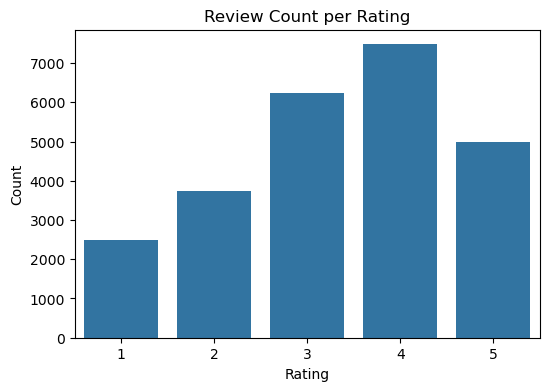

In [13]:
# visualization
# bar plot
plt.figure(figsize=(6,4))
sns.countplot(x="Score", data=df_filtered_imb)
plt.title("Review Count per Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

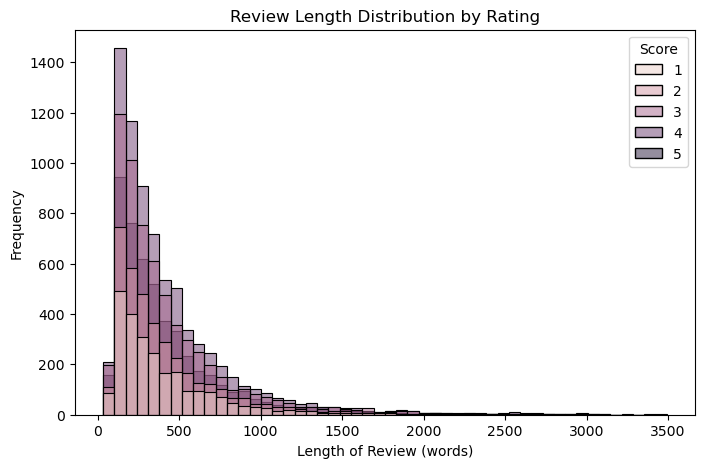

In [15]:
#Histogram: Word Count Distribution by Rating
plt.figure(figsize=(8,5))
sns.histplot(data=df_filtered_imb, x="review_len", hue="Score", bins=50)
plt.title("Review Length Distribution by Rating")
plt.xlabel("Length of Review (words)")
plt.ylabel("Frequency")
plt.show()

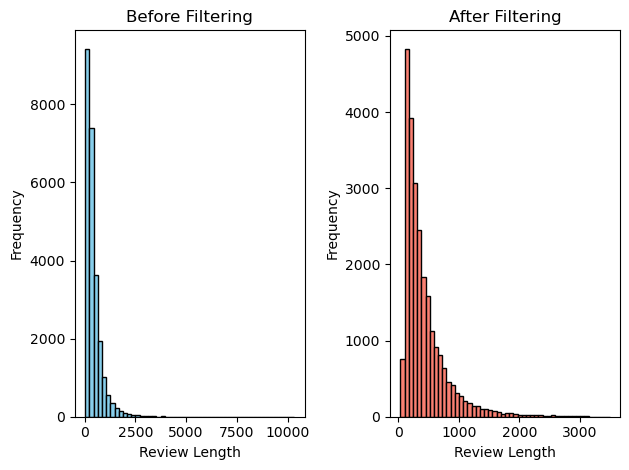

In [16]:
plt.subplot(1,2,1)
plt.hist(df['review_len'], bins=50, color='skyblue', edgecolor='black')
plt.title("Before Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df_filtered_imb['review_len'], bins=50, color='salmon', edgecolor='black')
plt.title("After Filtering")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [17]:
#Display 3–10 Sample Reviews per Rating
def show_samples(df, n=5):
    for rating in sorted(df_filtered_imb["Score"].unique()):
        print("\n" + "="*40)
        print(f"Rating: {rating} | Showing {n} sample reviews")
        print("="*40)
        
        samples = df[df["Score"] == rating].sample(n, random_state=42)
        
        for i, row in samples.iterrows():
            print(f"\nReview {i}:")
            print(row["cleaned_text"])  


In [18]:
show_samples(df_filtered_imb, n=10)



Rating: 1 | Showing 10 sample reviews

Review 22163:
try find specific type cup husband enjoy couldn find store check amazon large quantity cheap buy store    win   

Review 20823:
royal oak virginia salt peanut great highly recommend reorder time time buy pack total 40 oz can

Review 14082:
nutritional benefit extra virgin olive oil legendary robust flavor pompeian thickness hook oil year

Review 21550:
record vocal home pc shure c606 mic big improvement mic stereo sure    background noise prevailant mic method star instead gain gain knob turn way add gain software sound loud overall great product    regret buy recommend

Review 10861:
find wild thyme year ago continue use product    lemon salad refresher favorite salad dress light cal tasty excellent green pasta salad especially good fresh heirloom tomato fresh avocado slice yum customer service excellent helpful site share great recipe fan

Review 24832:
taste like coffee nice mild roast taste want bold maybe near burn taste like s

In [19]:
df_filtered_imb['Score'].value_counts()


Score
4    7476
3    6226
5    4988
2    3741
1    2494
Name: count, dtype: int64

In [20]:
x = df_filtered_imb['Text']   #(f)
y = df_filtered_imb['Score']  #(t)
x.head()

0    These chocolate sandwich creme cookies by WhoN...
1    This was my favorite stevia product and I had ...
2    I've always bought yellow popcorn, but after r...
3    I have four Chihuahuas. They seemed very inter...
4    This cereal brings back memories of when I was...
Name: Text, dtype: object

In [21]:
y.head()

0    3
1    5
2    3
3    4
4    4
Name: Score, dtype: int64

In [22]:
# Splitting into Train and Test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.30,random_state=42,stratify=y)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)


In [24]:
print("Training data shape:", x_train_vect.shape)
print("Test data shape:", x_test_vect.shape)


Training data shape: (17447, 10000)
Test data shape: (7478, 10000)
